# 實作 1 - 二元分類問題

## Step 1: 導入所需的套件

In [1]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt

## 導入Sklearn中的線性模組
from sklearn import linear_model

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split

## Step 2: 導入數據集

In [3]:
## 導入數據集
data = pd.read_csv('dataset/logistic_regression_sample.csv')

## 顯示數據集
data

,Student,Hours,Pass
0,Jack,4,1
1,Allen,4,1
2,Jen,2,0
3,Dora,3,0
4,John,1,0
5,Doris,1,0
6,Cindy,3,1
7,Ken,3,1
8,Angel,4,0
9,Tom,4,1


## Step 3: 定義自變量與應變量

In [14]:
## 定義自變量與應變量
X = data['Hours'].values
y = data['Pass'].values

print('Independent Variable: ', X)
print('Dependent Variable: ', y)


Independent Variable:  [4 4 2 3 1 1 3 3 4 4 1 1 2 2 3 3 3 3 2]
Dependent Variable:  [1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1]


## Step 4: 將特徵向量轉為2D向量

In [18]:
## 由於 Sklearn 能接受的特徵格式為 (n_samples, n_features)，所以使用 reshape 將特徵資料轉為2D向量，這樣 Sklearn 才能使用，一般狀況下，一維特徵才需要轉換
print('Original X shape: ', X.shape)

## reshape用法: -1代表自動配置幾個框框(程式會自行根據有幾個值配置幾個框框架，也就是拿總共的數量除以後面設定框框內有幾個值)
## 轉為2D向量
X = X.reshape(-1, 1)
print(X)
print('After reshaping data to 2D vector : ', X.shape)

Original X shape:  (19,)
[[4]
 [4]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [4]
 [4]
 [1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [2]]
After reshaping data to 2D vector :  (19, 1)


## Step 5: 將數據集分成訓練集與測試集

In [19]:
## 將數據集分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Step 6: 建立邏輯迴歸模型 Logistic Regression Model 與訓練模型

In [20]:
## 建立邏輯迴歸模型
model = linear_model.LogisticRegression()

## 擬和數據
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 7: 檢視模型係數與截距 Coeficient & Interception

In [21]:
## 查看建出來的模型係數與截距 y = w1x + w0
w1 = float(model.coef_)
w0 = float(model.intercept_)

print('Coeficient: ', w1)
print('Interception: ', w0)

Coeficient:  0.5672535305693119
Interception:  -1.3328997193245475


## Step 8: Sigmoid - 套入轉換函數 (將Logit(Odds)值轉換成 -> 0~1之間的數值)

In [22]:
## 套用 Sigmoid轉換函數，將值轉換成介於0~1 之間的值(機率)
def sigmoid(x, w0, w1):
    logit_odds = w0 + w1 * x
    return 1 / (1 + np.exp(-logit_odds))
    

## Step 9: 視覺化轉換結果圖

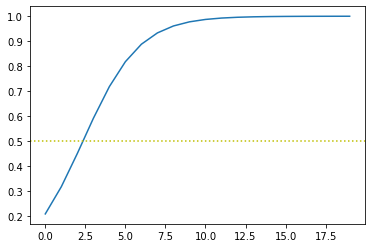

In [23]:
## 視覺化後Sigmoid圖
x = np.arange(0, 20, 1)
result = sigmoid(x, w0, w1)

plt.plot(x, result)

## 畫出50%的機率線
plt.axhline(y = 0.5, ls = 'dotted', color = 'y')


## Step 10: 預測測試集

In [27]:
## 預測測試集
prediction = model.predict(X_test)

print('Real Result: ', y_test)
print('Model Predict: ', prediction)


## 預測自行定義的數據集
result = model.predict([[1], [2], [2.5], [3], [3.5], [4], [5], [6]])

print('Define your own data and predict: ', result)

Real Result:  [0 1 0 1]
Model Predict:  [1 1 0 0]
Define your own data and predict:  [0 0 1 1 1 1 1 1]


## Step 11: 模型預測測試集中每筆數據為0或1的機率

In [28]:
## 預測測試集為1或0的機率
proba = model.predict_proba(X_test)
print('Probability (0 or 1)', proba)

Probability (0 or 1) [[0.4088163  0.5911837 ]
 [0.4088163  0.5911837 ]
 [0.54943612 0.45056388]
 [0.54943612 0.45056388]]


## Step 12: 模型表現 - 準確度 Accuracy

In [29]:
## 模型表現
score = model.score(X_test, y_test)
print('Accuracy :' + str(score * 100) + '%')

Accuracy :50.0%


# 實作 2 - 多元分類問題

## Step 1: 導入所需的套件

In [30]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt

## 導入Sklearn中的線性模組
from sklearn import linear_model
## 導入Sklearn的內建數據集
from sklearn import datasets

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split

## Step 2: 導入數據集

In [32]:
## 導入iris數據集(鳶尾花數據集)
iris_data = datasets.load_iris()
## 顯示數據集
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Step 3: 定義自變量與應變量

In [33]:
## 定義自變量與應變量
X = iris_data.data
y = iris_data.target

print('Independent Variable: ', X)
print('Dependent Variable: ', y)

Independent Variable:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.

## Step 5: 將數據集分成訓練集與測試集

In [34]:
## 將數據集分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Step 6: 建立邏輯迴歸模型 Logistic Regression Model 與訓練模型

In [35]:
## 建立邏輯迴歸模型
model = linear_model.LogisticRegression()

## 擬和數據
model.fit(X_train, y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 7: 預測測試集

In [39]:
## 預測測試集
prediction = model.predict(X_test)
print('Real y (test data): ', y_test)
print('Predict y (test data)', prediction)

## 查看模型預測0、1、2的機率
probability = model.predict_proba(X_test)
print('Probability (0 or 1 or 2): ', probability)

Real y (test data):  [0 1 2 1 1 2 2 1 2 1 1 2 0 2 0 2 0 2 2 2 1 1 0 2 1 2 2 1 1 2]
Predict y (test data) [0 1 2 1 1 2 2 1 2 1 2 2 0 2 0 2 0 2 2 2 1 1 0 2 1 2 1 1 1 2]
Probability (0 or 1 or 2):  [[9.63686532e-01 3.63132924e-02 1.75222019e-07]
 [1.07574506e-02 8.98088376e-01 9.11541730e-02]
 [2.49142162e-05 1.27485520e-01 8.72489566e-01]
 [2.35798020e-02 9.30301769e-01 4.61184292e-02]
 [2.19478761e-02 9.46475534e-01 3.15765897e-02]
 [1.43602535e-04 1.30353278e-01 8.69503120e-01]
 [1.11362279e-07 5.34629536e-03 9.94653593e-01]
 [1.03123468e-02 7.98148327e-01 1.91539326e-01]
 [5.56104282e-05 1.06288516e-01 8.93655874e-01]
 [3.15857582e-03 7.78516615e-01 2.18324809e-01]
 [7.69095917e-04 4.55551926e-01 5.43678978e-01]
 [2.36721813e-05 2.99622625e-02 9.70014065e-01]
 [9.80272061e-01 1.97278939e-02 4.48886032e-08]
 [7.31795353e-04 2.97582532e-01 7.01685672e-01]
 [9.73794169e-01 2.62057313e-02 9.97324567e-08]
 [1.44802727e-03 4.78512696e-01 5.20039277e-01]
 [9.79315374e-01 2.06845311e-02 9.476

## Step 8: 模型表現 - 準確度 Accuracy

In [42]:
## 模型預測訓練集的準確度
accuracy_train = model.score(X_train, y_train)
print('Accuracy (Train Data): ' + str(accuracy_train * 100) + '%')

## 模型預測測試集的準確度
accuracy_test = model.score(X_test, y_test)
print('Accuracy (Test Data): ' + str(accuracy_test * 100) + '%')


Accuracy (Train Data): 99.16666666666667%
Accuracy (Test Data): 93.33333333333333%


## Step 9: 邏輯迴歸模型 Logistic Regression Model 的其他相關資訊